# Regressão Linear - Projeto

Parabéns! Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

Basta seguir as etapas abaixo para analisar os dados do cliente (é falso, não se preocupe, eu não lhe dei números reais de cartões de crédito ou e-mails).

## Imports
** Importe pandas, numpy, matplotlib,e seaborn. Em seguida, configure% matplotlib inline
(Você importará sklearn conforme você precisar). **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

** Leia no arquivo csv do Ecommerce Customers como um DataFrame chamado clientes. **

In [21]:
clientes = pd.read_csv('CSVs/Ecommerce Customers')

** Verifique o cabeçalho dos clientes e confira os seus métodos info () e describe(). **

In [25]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [32]:
clientes.describe(include='O')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,hoovernicole@dorsey.net,"022 Taylor Mews Suite 692\nHallberg, NJ 53614",GreenYellow
freq,1,1,7


In [22]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [24]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Análise de dados exploratória

** Vamos explorar os dados! **

Pelo resto do exercício, só estaremos usando os dados numéricos do arquivo csv.
___
** Use seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual. A correlação faz sentido? **

In [66]:
sns.set_style('whitegrid')
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

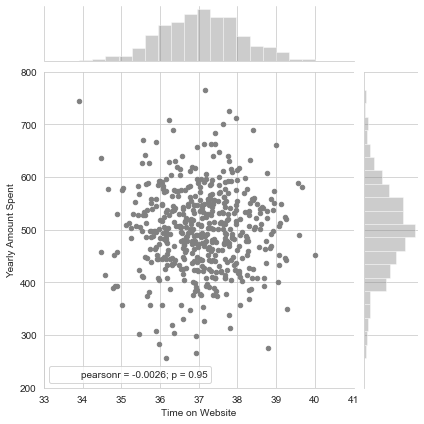

In [67]:
sns.jointplot('Time on Website', 'Yearly Amount Spent', data=clientes,
             color='gray', s=20,
              ylim=(200,800), xlim=(33,41)).annotate(stats.pearsonr)

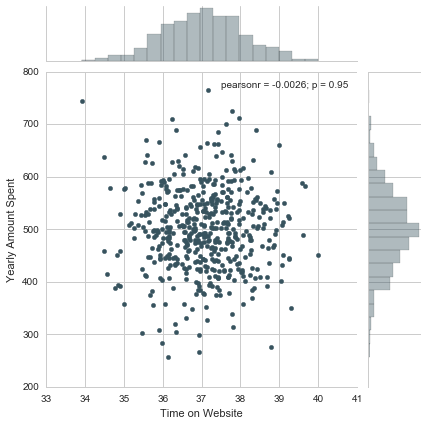

** Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso. **

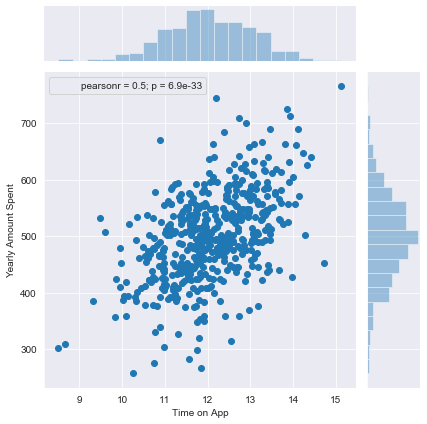

In [69]:
sns.set_style('darkgrid')
sns.jointplot('Time on App', 'Yearly Amount Spent', data=clientes)\
.annotate(stats.pearsonr)

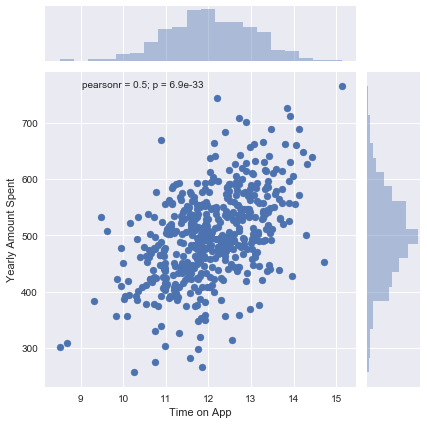

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

** Use jointplot criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

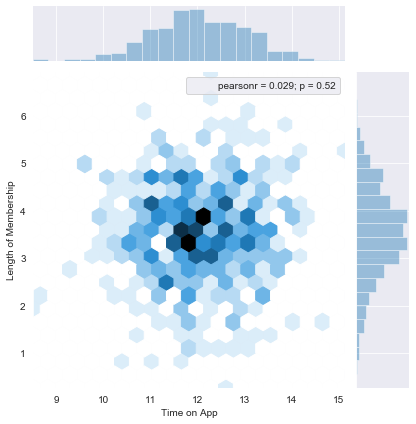

In [72]:
sns.jointplot('Time on App', 'Length of Membership', data=clientes,
             kind='hex')\
.annotate(stats.pearsonr)

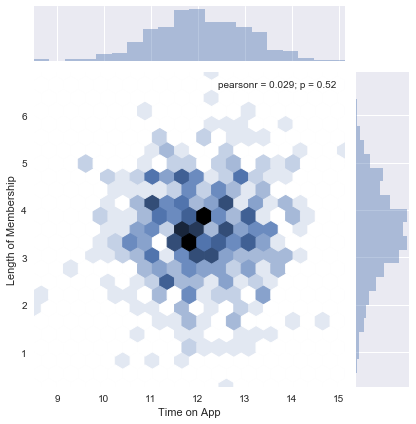

** Vamos explorar esses tipos de relações em todo o conjunto de dados. Use [parplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) para recriar o gráfico abaixo. (Não se preocupe com as cores) **

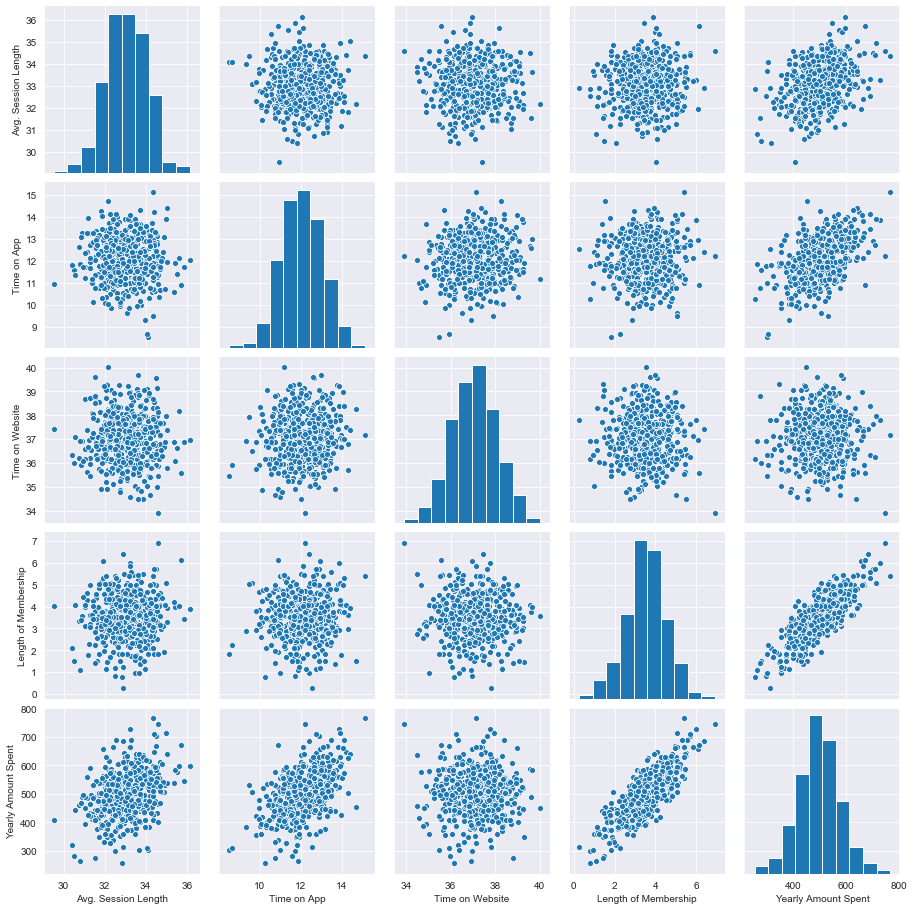

In [73]:
sns.pairplot(clientes)

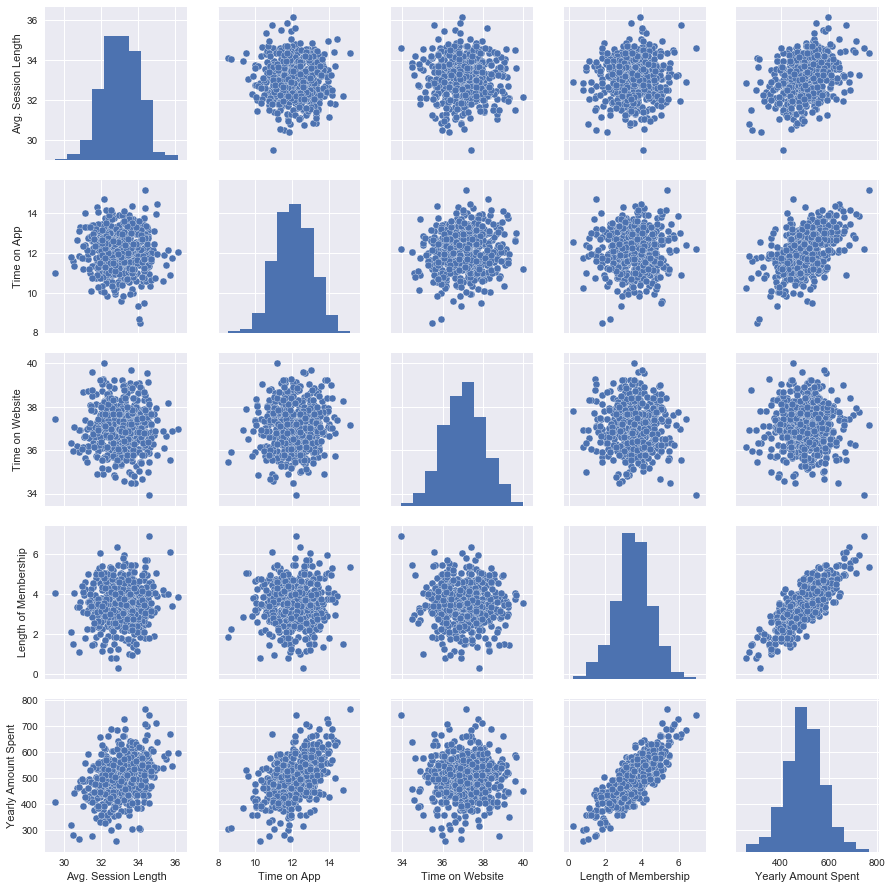

** Baseado neste plot o que parece ser a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent)? 
#### Lenght of Membership: Há quantos anos o cliente é membro.
**

In [86]:
clientes.corr()\
.style.background_gradient(cmap='OrRd')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


** Crie um plot de um modelo linear (usando o lmplot de Seaborn) da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

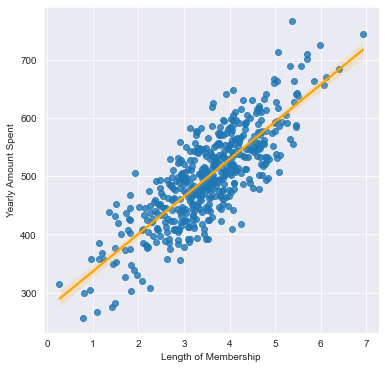

In [98]:
plt.figure(figsize=(6,6))
sns.regplot('Length of Membership', 'Yearly Amount Spent',
            data=clientes, line_kws={'color':'orange'})
plt.xlim=(0,800)

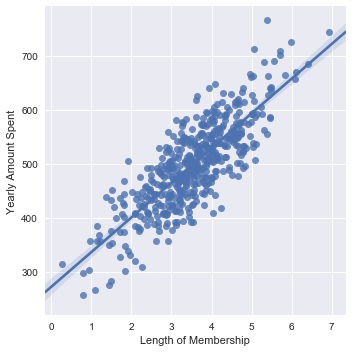

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.
** Defina uma variável X igual a todas as características numéricas dos clientes e uma variável y igual à coluna Valor anual gasto (Yearly Amount Spent). **

In [110]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [111]:
X = clientes.drop(['Email', 'Address', 'Avatar', 'Yearly Amount Spent'], axis=1, inplace = False)
y = clientes['Yearly Amount Spent']

In [115]:
X.shape, y.shape

((500, 4), (500,))

** Use model_selection.train_test_split da sklearn para dividir os dados em conjuntos de treinamento e teste. Defina test_size = 0.3 e random_state = 101 **

In [116]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
X_train.shape, y_train.shape

((350, 4), (350,))

In [127]:
X_test.shape, y_test.shape

((150, 4), (150,))

## Treinando o modelo

Agora é hora de treinar nosso modelo em nossos dados de treinamento!

** Importe LinearRegression do sklearn.linear_model **

In [128]:
from sklearn.linear_model import LinearRegression

** Crie uma instância de um modelo LinearRegression () chamado lm. **

In [131]:
lm = LinearRegression(n_jobs=-1, normalize=True)

** Treine lm nos dados de treinamento. **

In [132]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print os coeficientes do modelo**

In [133]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

## Previsão de dados de teste
Agora que nos ajustamos ao nosso modelo, vamos avaliar o seu desempenho ao prever os valores de teste!

** Use lm.predict () para prever o conjunto X_test dos dados. **

In [135]:
predict = lm.predict(X_test)

** Crie um diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos. **

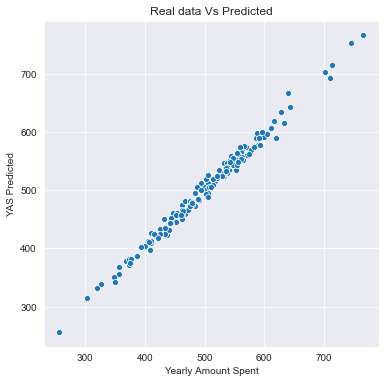

In [138]:
plt.figure(figsize=(6,6))
sns.scatterplot(y_test, predict)
plt.ylabel('YAS Predicted')
plt.title('Real data Vs Predicted')
plt.show()

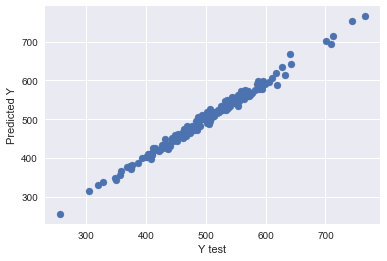

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [139]:
from sklearn import metrics

In [146]:
print(f'MAE = {round(metrics.mean_absolute_error(y_test, predict),11)}')
print(f'MSE = {round(metrics.mean_squared_error(y_test, predict),9)}')
print(f'RMSE = {round(metrics.mean_squared_error(y_test, predict)**0.5,11)}')

MAE = 7.22814865343
MSE = 79.813051651
RMSE = 8.93381506698


MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

** Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). **

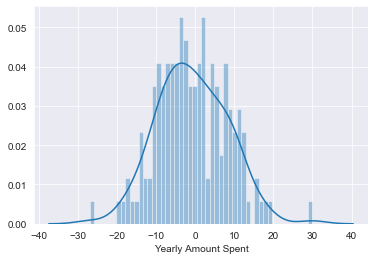

In [231]:
sns.distplot(y_test-predict, bins=50)

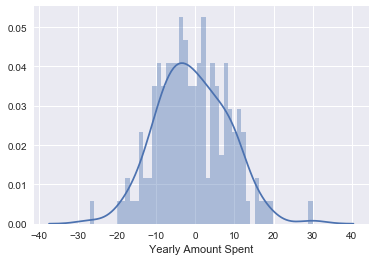

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

** Recrie o quadro de dados abaixo. **

In [248]:
pd.DataFrame(columns=['Coefs'], index=X.columns, data=lm.coef_)

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Como você pode interpretar esses coeficientes? **
#### Pode-se considerar que quanto maior, mais conversões são obtidas pelo serviço.

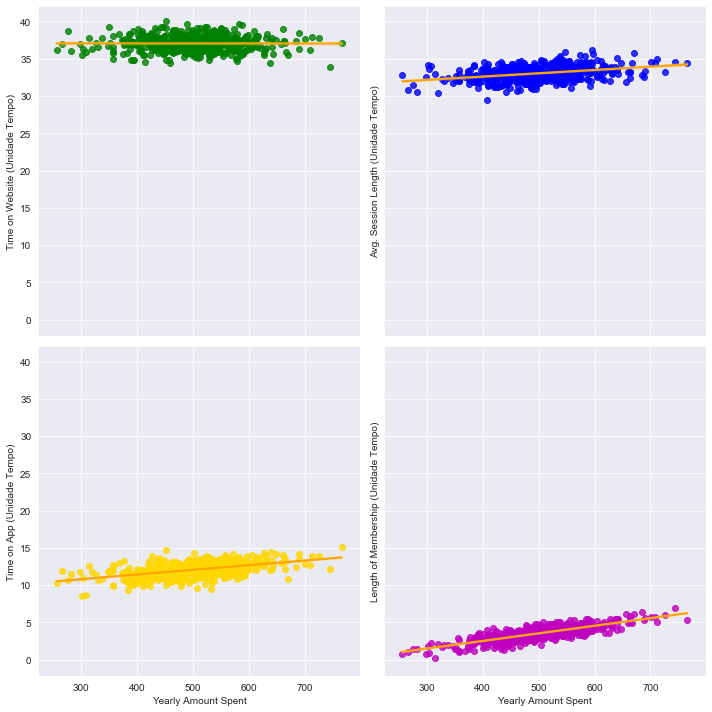

In [304]:
fig, axs = plt.subplots(2,2, figsize=(10,10), clear=True, sharex=True, sharey=True)
   
axs[0,0] = sns.regplot(y, X['Time on Website'], ax=axs[0,0],
                       color='g', line_kws={'color':'orange'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Time on Website (Unidade Tempo)')

axs[0,1] = sns.regplot(y, X['Avg. Session Length'], ax=axs[0,1],
                       color='b', line_kws={'color':'orange'})
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('Avg. Session Length (Unidade Tempo)')

axs[1,0] = sns.regplot(y, X['Time on App'], ax=axs[1,0], 
                       color='gold', line_kws={'color':'orange'})
axs[1,0].set_ylabel('Time on App (Unidade Tempo)')

axs[1,1] = sns.regplot(y, X['Length of Membership'], ax=axs[1,1],
                       color='m', line_kws={'color':'orange'})
axs[1,1].set_ylabel('Length of Membership (Unidade Tempo)')

plt.tight_layout()

** Você acha que a empresa deve se concentrar mais em seu aplicativo móvel ou em seu site? **

#### Tendo em vista a eficácia do serviço, que tem mais conversões por unidade de tempo utilizado, concentraria mais esforços no desenvolvimento do aplicatico móvel para obter mais conversões.

In [302]:
clientes.sort_values(by='Yearly Amount Spent').head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
225,alexandra26@summers-davis.com,Unit 7032 Box 7016\nDPO AE 44749-2992,Navy,32.836941,10.256549,36.143908,0.789520,256.670582
303,brandon77@richardson.com,"109 Jessica Manor\nNorth Patriciashire, PR 84726",GhostWhite,30.816201,11.851399,36.925043,1.084585,266.086341
415,brian51@cook.info,"0508 Terrance Cliff\nRebekahtown, NC 48724-8308",SaddleBrown,31.517122,10.745189,38.791235,1.428824,275.918421
299,morganorozco@hotmail.com,"0001 Mack Mill\nNorth Jennifer, NE 42021-5936",LightPink,30.492537,11.562936,35.976565,1.481617,282.471246
173,fischermonica@gmail.com,9847 Michael Plaza Suite 837\nLake Christopher...,Navy,32.529769,11.747732,36.939882,0.801516,298.762008


In [300]:
clientes.sort_values(by='Yearly Amount Spent', ascending = False).head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
65,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462
157,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867
50,william82@gmail.com,"11143 Park Squares\nSamanthatown, UT 97073",SandyBrown,33.256335,13.858062,37.780265,5.976768,725.584814
205,jeffrey54@mcdonald-williams.com,"297 Francis Valley\nSouth Lindsey, NY 13669-5367",Gainsboro,34.967610,13.919494,37.952013,5.066697,712.396327
368,rhonda01@gmail.com,"939 Watson Run\nStaceyberg, VT 58376-0454",Orchid,34.385820,12.729720,36.232110,5.705941,708.935185
